# Library Preparation

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data Wrangling and Preprocessing

In [111]:
import os
import zipfile
import glob


for file in glob.glob('zip_dataset/*.zip'):
  print(file)
  with zipfile.ZipFile(file, 'r') as zip_ref:
    zip_ref.extractall('metadata')

zip_dataset\od_17191_produksi_ubi_kayu_berdasarkan_kabupatenkota.zip
zip_dataset\od_17192_produksi_ubi_jalar_berdasarkan_kabupatenkota.zip
zip_dataset\od_17232_luas_areal_tanam_kacang_hijau_berdasarkan_kabupatenkota.zip
zip_dataset\od_17235_luas_areal_tanam_ubi_kayu_berdasarkan_kabupatenkota.zip
zip_dataset\od_17236_luas_areal_tanam_ubi_jalar_berdasarkan_kabupatenkota.zip
zip_dataset\od_17238_luas_areal_tanam_kedelai_berdasarkan_kabupatenkota.zip
zip_dataset\od_17239_luas_areal_tanam_kacang_tanah_berdasarkan_kabupatenkota.zip
zip_dataset\od_17242_luas_panen_kedelai_berdasarkan_kabupatenkota.zip
zip_dataset\od_17243_luas_panen_kacang_tanah_berdasarkan_kabupatenkota.zip
zip_dataset\od_17244_luas_panen_kacang_hijau_berdasarkan_kabupatenkota.zip
zip_dataset\od_17245_luas_panen_ubi_kayu_berdasarkan_kabupatenkota.zip
zip_dataset\od_17246_luas_panen_ubi_jalar_berdasarkan_kabupatenkota.zip
zip_dataset\od_17260_produksi_kedelai_berdasarkan_kabupatenkota.zip
zip_dataset\od_17261_produksi_kacang_

In [113]:
def wrangling_data(dataset_type: str):
  wragled_data = pd.DataFrame()

  for folder in os.listdir('metadata'):
    if os.path.isdir(os.path.join('metadata', folder)):
      for file in os.listdir(f'metadata/{folder}'):
        if dataset_type in file and file.endswith('.csv'):
          data = pd.read_csv(f'metadata/{folder}/{file}')

          if dataset_type in ('produksi',):
            file_name = '_'.join(file.split('_')[3:-3])
            data = data[data['tahun'] >= 2015].drop_duplicates(['nama_kabupaten_kota', 'tahun'], keep='last')
            data = data.rename(
              columns={col: col.split('_')[0] + '_' + file_name for col in data.columns if col.startswith('produksi')})
          
          if dataset_type in ('luas_areal_tanam', 'luas_panen'):
            col_name = '_'.join(file.split("_")[2:-3])
            data.rename(columns={data.columns[5]: col_name}, inplace=True)

          if wragled_data.empty:
            wragled_data = data
            col_data = wragled_data.iloc[:, 5:6]
            wragled_data = wragled_data.drop(col_data, axis=1)
            wragled_data = pd.concat([wragled_data.reset_index(drop=True), col_data.reset_index(drop=True)], axis=1)
          else:
            column_name = [col for col in data.columns if dataset_type in col][0]
            data = data[[column_name]]
            wragled_data = pd.concat([wragled_data.reset_index(drop=True), data.reset_index(drop=True)], axis=1)

  return wragled_data

In [114]:
dataset_produktivitas = wrangling_data('produktivitas')
dataset_produktivitas

id  kode_provinsi nama_provinsi  kode_kabupaten_kota  \
0      1             32    JAWA BARAT                 3201   
1      2             32    JAWA BARAT                 3202   
2      3             32    JAWA BARAT                 3203   
3      4             32    JAWA BARAT                 3204   
4      5             32    JAWA BARAT                 3205   
..   ...            ...           ...                  ...   
184  185             32    JAWA BARAT                 3275   
185  186             32    JAWA BARAT                 3276   
186  187             32    JAWA BARAT                 3277   
187  188             32    JAWA BARAT                 3278   
188  189             32    JAWA BARAT                 3279   

    nama_kabupaten_kota              satuan  tahun  produktivitas_kedelai  \
0       KABUPATEN BOGOR  KUINTAL PER HEKTAR   2015                   0.00   
1    KABUPATEN SUKABUMI  KUINTAL PER HEKTAR   2015                  14.16   
2     KABUPATEN CIANJUR  KUINTAL PER HEKTAR   2015                  12.30   
3     KABUPATEN BANDUNG  KUINTAL PER HEKTAR   2015                  17.47   
4       KABUPATEN GARUT  KUINTAL PER HEKTAR   2015                  16.43   
..                  ...                 ...    ...                    ...   
184         KOTA BEKASI  KUINTAL PER HEKTAR   2021                   0.00   
185          KOTA DEPOK  KUINTAL PER HEKTAR   2021                   0.00   
186         KOTA CIMAHI  KUINTAL PER HEKTAR   2021                   0.00   
187    KOTA TASIKMALAYA  KUINTAL PER HEKTAR   2021                  11.65   
188         KOTA BANJAR  KUINTAL PER HEKTAR   2021                  11.70   

     produktivitas_kacang_tanah  produktivitas_kacang_hijau  \
0                         16.29                       10.77   
1                         24.94                       10.83   
2                         17.14                       10.73   
3                         10.15                        0.00   
4                         19.38                       12.30   
..                          ...                         ...   
184                        0.00                        0.00   
185                       15.32                        0.00   
186                       13.22                        0.00   
187                       15.20                        0.00   
188                       12.52                       11.16   

     produktivitas_ubi_kayu  produktivitas_ubi_jalar  
0                    249.14                   216.00  
1                    311.83                   164.22  
2                    239.30                   140.26  
3                    163.03                   146.00  
4                    245.53                   154.64  
..                      ...                      ...  
184                  319.89                     0.00  
185                  256.52                   257.00  
186                  290.77                   135.08  
187                  309.03                   231.16  
188                  319.06                    57.50  

[189 rows x 12 columns]

In [115]:
dataset_produksi = wrangling_data('produksi')
dataset_produksi

id  kode_provinsi nama_provinsi  kode_kabupaten_kota  \
0     53             32    JAWA BARAT                 3201   
1     54             32    JAWA BARAT                 3202   
2     55             32    JAWA BARAT                 3203   
3     56             32    JAWA BARAT                 3204   
4     57             32    JAWA BARAT                 3205   
..   ...            ...           ...                  ...   
184  238             32    JAWA BARAT                 3275   
185  239             32    JAWA BARAT                 3276   
186  240             32    JAWA BARAT                 3277   
187  241             32    JAWA BARAT                 3278   
188  242             32    JAWA BARAT                 3279   

    nama_kabupaten_kota satuan  tahun  produksi_ubi_kayu  produksi_ubi_jalar  \
0       KABUPATEN BOGOR    TON   2015             132519               72144   
1    KABUPATEN SUKABUMI    TON   2015             232715               14665   
2     KABUPATEN CIANJUR    TON   2015             147842               12708   
3     KABUPATEN BANDUNG    TON   2015              89553               21330   
4       KABUPATEN GARUT    TON   2015             629404               98444   
..                  ...    ...    ...                ...                 ...   
184         KOTA BEKASI    TON   2021                896                   0   
185          KOTA DEPOK    TON   2021                513                 103   
186         KOTA CIMAHI    TON   2021               1076                 149   
187    KOTA TASIKMALAYA    TON   2021               2843                 393   
188         KOTA BANJAR    TON   2021               3574                 425   

     produksi_kedelai  produksi_kacang_tanah  produksi_kacang_hijau  
0                   0                   1445                     14  
1                9365                  12223                   1132  
2                9905                  17239                    339  
3                 760                   1068                      0  
4               21433                  32551                   1326  
..                ...                    ...                    ...  
184                 0                      0                      0  
185                 0                     11                      0  
186                 0                     19                      0  
187                21                    146                      0  
188               232                    155                     63  

[189 rows x 12 columns]

In [116]:
dataset_luas_areal_tanam = wrangling_data('luas_areal_tanam')
dataset_luas_areal_tanam

id  kode_provinsi nama_provinsi  kode_kabupaten_kota  \
0      1             32    JAWA BARAT                 3201   
1      2             32    JAWA BARAT                 3202   
2      3             32    JAWA BARAT                 3203   
3      4             32    JAWA BARAT                 3204   
4      5             32    JAWA BARAT                 3205   
..   ...            ...           ...                  ...   
184  185             32    JAWA BARAT                 3275   
185  186             32    JAWA BARAT                 3276   
186  187             32    JAWA BARAT                 3277   
187  188             32    JAWA BARAT                 3278   
188  189             32    JAWA BARAT                 3279   

    nama_kabupaten_kota  satuan  tahun  luas_areal_tanam_kacang_hijau  \
0       KABUPATEN BOGOR  HEKTAR   2015                             13   
1    KABUPATEN SUKABUMI  HEKTAR   2015                           1045   
2     KABUPATEN CIANJUR  HEKTAR   2015                            316   
3     KABUPATEN BANDUNG  HEKTAR   2015                              0   
4       KABUPATEN GARUT  HEKTAR   2015                           1128   
..                  ...     ...    ...                            ...   
184         KOTA BEKASI  HEKTAR   2021                              0   
185          KOTA DEPOK  HEKTAR   2021                              0   
186         KOTA CIMAHI  HEKTAR   2021                              0   
187    KOTA TASIKMALAYA  HEKTAR   2021                              0   
188         KOTA BANJAR  HEKTAR   2021                             41   

     luas_areal_tanam_ubi_kayu  luas_areal_tanam_ubi_jalar  \
0                         4494                        3306   
1                         7850                         865   
2                         6503                         848   
3                         5168                        1481   
4                        24691                        6274   
..                         ...                         ...   
184                         32                           0   
185                         16                           6   
186                         60                          12   
187                         63                          16   
188                         98                          74   

     luas_areal_tanam_kedelai  luas_areal_tanam_kacang_tanah  
0                          89                            844  
1                        8075                           4926  
2                        8588                          10048  
3                         422                           1055  
4                       13401                          16805  
..                        ...                            ...  
184                         0                              0  
185                         0                              9  
186                         0                             13  
187                       101                             96  
188                       200                            122  

[189 rows x 12 columns]

In [117]:
dataset_luas_panen = wrangling_data('luas_panen')
dataset_luas_panen

id  kode_provinsi nama_provinsi  kode_kabupaten_kota  \
0      1             32    JAWA BARAT                 3201   
1      2             32    JAWA BARAT                 3202   
2      3             32    JAWA BARAT                 3203   
3      4             32    JAWA BARAT                 3204   
4      5             32    JAWA BARAT                 3205   
..   ...            ...           ...                  ...   
184  185             32    JAWA BARAT                 3275   
185  186             32    JAWA BARAT                 3276   
186  187             32    JAWA BARAT                 3277   
187  188             32    JAWA BARAT                 3278   
188  189             32    JAWA BARAT                 3279   

    nama_kabupaten_kota  satuan  tahun  luas_panen_kedelai  \
0       KABUPATEN BOGOR  HEKTAR   2015                   0   
1    KABUPATEN SUKABUMI  HEKTAR   2015                6614   
2     KABUPATEN CIANJUR  HEKTAR   2015                8052   
3     KABUPATEN BANDUNG  HEKTAR   2015                 435   
4       KABUPATEN GARUT  HEKTAR   2015               13045   
..                  ...     ...    ...                 ...   
184         KOTA BEKASI  HEKTAR   2021                   0   
185          KOTA DEPOK  HEKTAR   2021                   0   
186         KOTA CIMAHI  HEKTAR   2021                   0   
187    KOTA TASIKMALAYA  HEKTAR   2021                  18   
188         KOTA BANJAR  HEKTAR   2021                 198   

     luas_panen_kacang_tanah  luas_panen_kacang_hijau  luas_panen_ubi_kayu  \
0                        887                       13                 5319   
1                       4901                     1045                 7463   
2                      10056                      316                 6178   
3                       1052                        0                 5493   
4                      16798                     1078                25635   
..                       ...                      ...                  ...   
184                        0                        0                   28   
185                        7                        0                   20   
186                       14                        0                   37   
187                       96                        0                   92   
188                      124                       56                  112   

     luas_panen_ubi_jalar  
0                    3340  
1                     893  
2                     906  
3                    1461  
4                    6366  
..                    ...  
184                     0  
185                     4  
186                    11  
187                    17  
188                    74  

[189 rows x 12 columns]

In [118]:
# eksport all dataset to csv
dataset_produktivitas.to_csv('dataset_produktivitas.csv', index=False)
dataset_produksi.to_csv('dataset_produksi.csv', index=False)
dataset_luas_areal_tanam.to_csv('dataset_luas_areal_tanam.csv', index=False)
dataset_luas_panen.to_csv('dataset_luas_panen.csv', index=False)

In [124]:
# concat all dataset and remove satuan column
cwd = os.getcwd()
all_dataset = pd.DataFrame()

for file in os.listdir(cwd):
  if file.endswith('.csv') and file.startswith('dataset'):
    data = pd.read_csv(file)
    if all_dataset.empty:
      all_dataset = data
      all_dataset.drop('satuan', axis=1, inplace=True)
    else:
      all_dataset = pd.concat([all_dataset, data.iloc[:,7:]], axis=1)

all_dataset.to_csv('all_dataset.csv', index=False)

# Exploratory Data Analysis

In [129]:
data = pd.read_csv('all_dataset.csv')
data

id  kode_provinsi nama_provinsi  kode_kabupaten_kota  \
0      1             32    JAWA BARAT                 3201   
1      2             32    JAWA BARAT                 3202   
2      3             32    JAWA BARAT                 3203   
3      4             32    JAWA BARAT                 3204   
4      5             32    JAWA BARAT                 3205   
..   ...            ...           ...                  ...   
184  185             32    JAWA BARAT                 3275   
185  186             32    JAWA BARAT                 3276   
186  187             32    JAWA BARAT                 3277   
187  188             32    JAWA BARAT                 3278   
188  189             32    JAWA BARAT                 3279   

    nama_kabupaten_kota  ...  produktivitas_kedelai  \
0       KABUPATEN BOGOR  ...                   0.00   
1    KABUPATEN SUKABUMI  ...                  14.16   
2     KABUPATEN CIANJUR  ...                  12.30   
3     KABUPATEN BANDUNG  ...                  17.47   
4       KABUPATEN GARUT  ...                  16.43   
..                  ...  ...                    ...   
184         KOTA BEKASI  ...                   0.00   
185          KOTA DEPOK  ...                   0.00   
186         KOTA CIMAHI  ...                   0.00   
187    KOTA TASIKMALAYA  ...                  11.65   
188         KOTA BANJAR  ...                  11.70   

     produktivitas_kacang_tanah  produktivitas_kacang_hijau  \
0                         16.29                       10.77   
1                         24.94                       10.83   
2                         17.14                       10.73   
3                         10.15                        0.00   
4                         19.38                       12.30   
..                          ...                         ...   
184                        0.00                        0.00   
185                       15.32                        0.00   
186                       13.22                        0.00   
187                       15.20                        0.00   
188                       12.52                       11.16   

     produktivitas_ubi_kayu  produktivitas_ubi_jalar  
0                    249.14                   216.00  
1                    311.83                   164.22  
2                    239.30                   140.26  
3                    163.03                   146.00  
4                    245.53                   154.64  
..                      ...                      ...  
184                  319.89                     0.00  
185                  256.52                   257.00  
186                  290.77                   135.08  
187                  309.03                   231.16  
188                  319.06                    57.50  

[189 rows x 26 columns]

## Descriptive Statistics

In [140]:
pd.set_option('display.max_columns', 100)
data.iloc[:, 7:].describe()

luas_areal_tanam_ubi_kayu  luas_areal_tanam_ubi_jalar  \
count                 189.000000                  189.000000   
mean                 2324.973545                  772.640212   
std                  4425.640436                 1471.579401   
min                     0.000000                    0.000000   
25%                    39.000000                   13.000000   
50%                   223.000000                  132.000000   
75%                  3096.000000                  710.000000   
max                 25594.000000                 6656.000000   

       luas_areal_tanam_kedelai  luas_areal_tanam_kacang_tanah  \
count                189.000000                     189.000000   
mean                2017.470899                    1158.661376   
std                 4273.344078                    2706.712356   
min                    0.000000                       0.000000   
25%                    0.000000                      22.000000   
50%                  308.000000                     192.000000   
75%                 1751.000000                     814.000000   
max                29785.000000                   17379.000000   

       luas_panen_kedelai  luas_panen_kacang_tanah  luas_panen_kacang_hijau  \
count          189.000000               189.000000               189.000000   
mean          1920.904762              1155.883598               279.248677   
std           4164.402326              2700.527503               547.207472   
min              0.000000                 0.000000                 0.000000   
25%              0.000000                25.000000                 0.000000   
50%            255.000000               182.000000                32.000000   
75%           1659.000000               809.000000               192.000000   
max          27920.000000             17223.000000              2736.000000   

       luas_panen_ubi_kayu  luas_panen_ubi_jalar  produksi_ubi_kayu  \
count           189.000000            189.000000         189.000000   
mean           2348.370370            773.306878       63140.947090   
std            4435.238102           1475.740572      119907.167643   
min               0.000000              0.000000           0.000000   
25%              38.000000             14.000000         818.000000   
50%             237.000000            135.000000        5748.000000   
75%            2924.000000            712.000000       81136.000000   
max           26134.000000           6727.000000      752894.000000   

       produksi_ubi_jalar  produksi_kedelai  produksi_kacang_tanah  \
count          189.000000        189.000000             189.000000   
mean         17779.645503       3013.158730            1865.772487   
std          36706.562909       6427.495074            4704.900246   
min              0.000000          0.000000               0.000000   
25%            162.000000          0.000000              26.000000   
50%           2181.000000        386.000000             282.000000   
75%          13502.000000       2978.000000            1199.000000   
max         196334.000000      41351.000000           33508.000000   

       produksi_kacang_hijau  produktivitas_kedelai  \
count             189.000000             189.000000   
mean              343.417989              10.399101   
std               691.217681               7.779802   
min                 0.000000               0.000000   
25%                 0.000000               0.000000   
50%                48.000000              13.380000   
75%               255.000000              16.920000   
max              4450.000000              23.790000   

       produktivitas_kacang_tanah  produktivitas_kacang_hijau  \
count                  189.000000                  189.000000   
mean                    12.927354                    8.483228   
std                      5.882249                    6.187417   
min                      0.000000                    0.000000   
25%                     11.3200

## Heatmap Plot

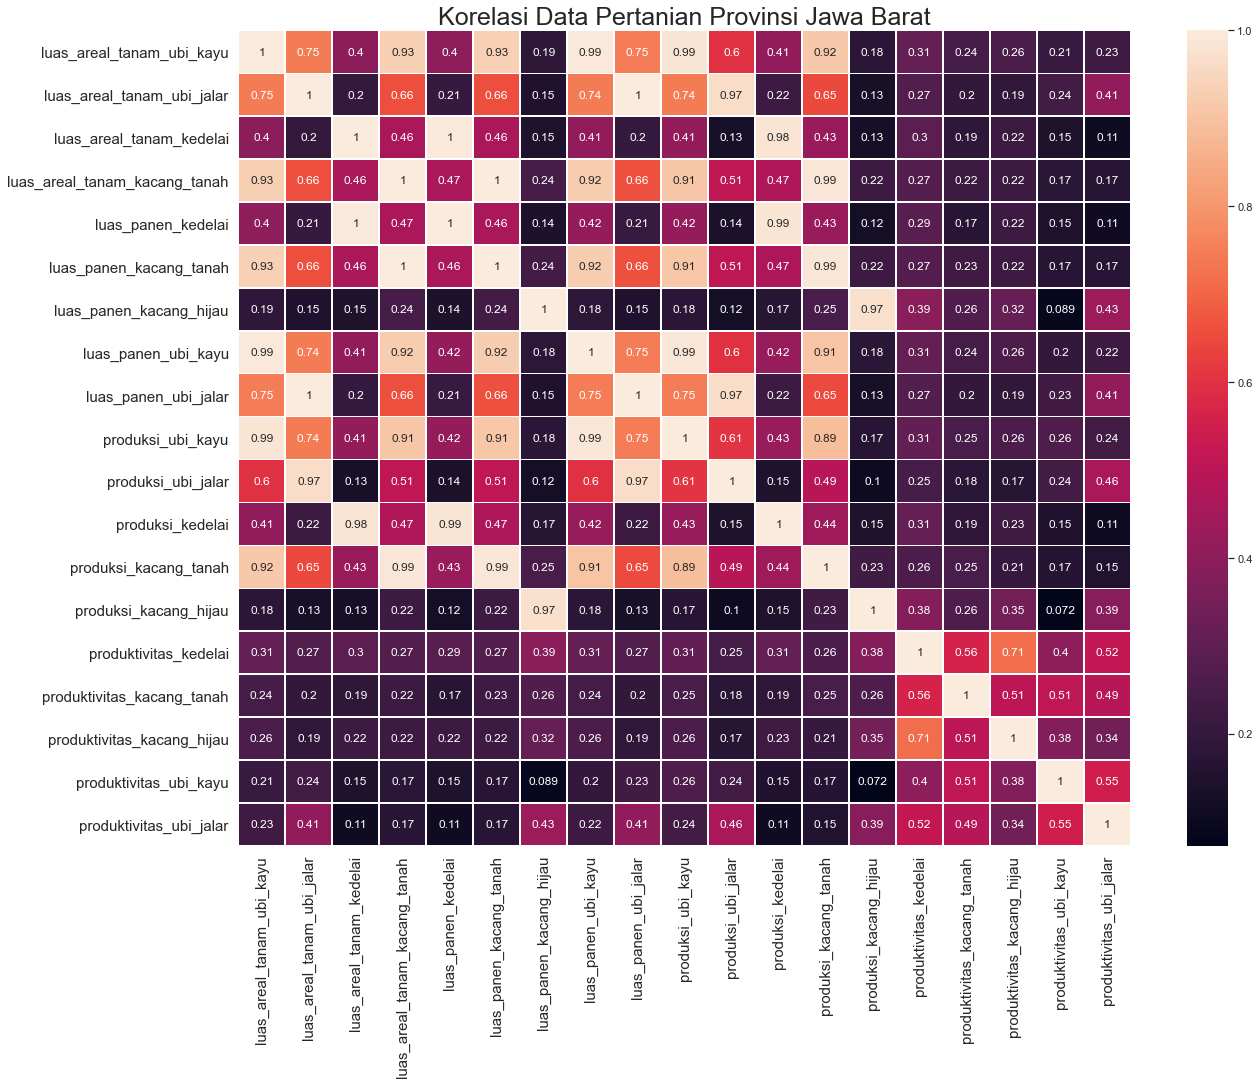

In [252]:
corr_data = data.iloc[:, 7:].corr()

plt.figure(figsize=(20,15))
sns.heatmap(
  data=corr_data,
  annot=True,
  # fmt=".1f",
  linewidth=.5)
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title(f'Korelasi Data Pertanian Provinsi Jawa Barat', fontsize=25)
plt.show()

## Box plot

In [266]:
def create_boxplot(data: pd.DataFrame, col: str, satuan_col: str = ""):

  """
  Create boxplot of col and nama kabupaten/kota from data
  """

  sorted_index = data.groupby('nama_kabupaten_kota').mean(numeric_only=True).sort_values(by=col, ascending=False).index

  sorted_boxplot_data = data.copy().set_index('nama_kabupaten_kota').loc[sorted_index].reset_index()

  col_title = col.replace('_', ' ').title()

  plt.figure(figsize=(20, 15))
  sns.set_theme()
  sns.boxplot(
    x='nama_kabupaten_kota', 
    y=col, 
    showmeans=True,
    meanprops={"marker":"o",
                "markerfacecolor":"white", 
                "markeredgecolor":"black",
                "markersize":"12"},
    data=sorted_boxplot_data)
  plt.axhline(data[col].mean(), color='r', linestyle='--', linewidth=3)
  plt.xticks(rotation=90)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.grid(True, color='grey', linestyle='--', linewidth=0.5)
  plt.xlabel('Nama Kabupaten/Kota', fontsize=20)
  plt.ylabel(f'{col_title} ({satuan_col})', fontsize=20)
  plt.title(f'Rata-Rata {col_title} di Kabupaten/Kota di Provinsi Jawa Barat Tahun 2015-2021', fontsize=25)
  plt.show()

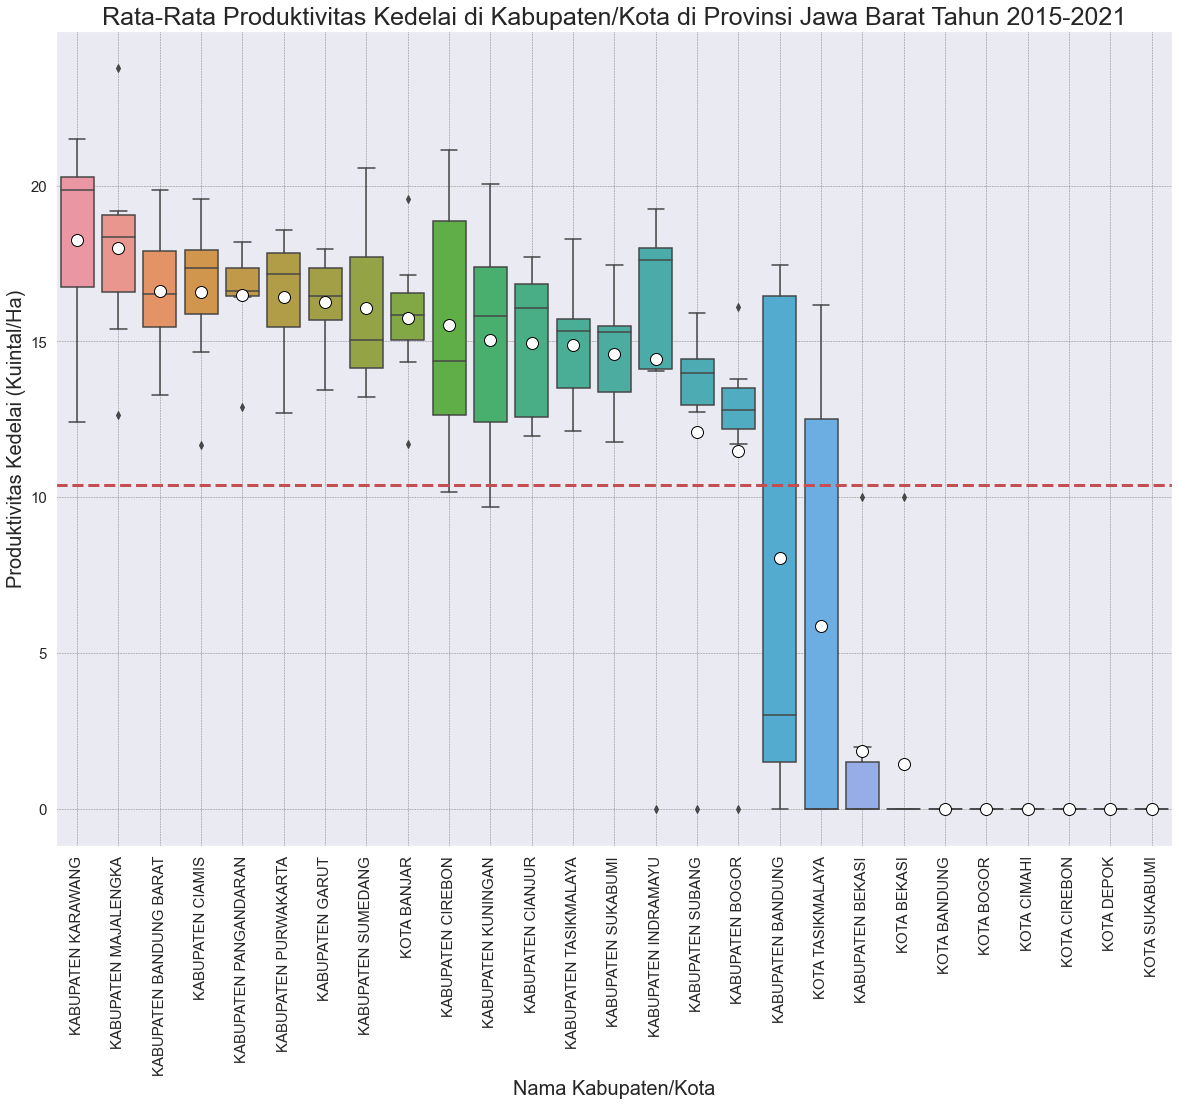

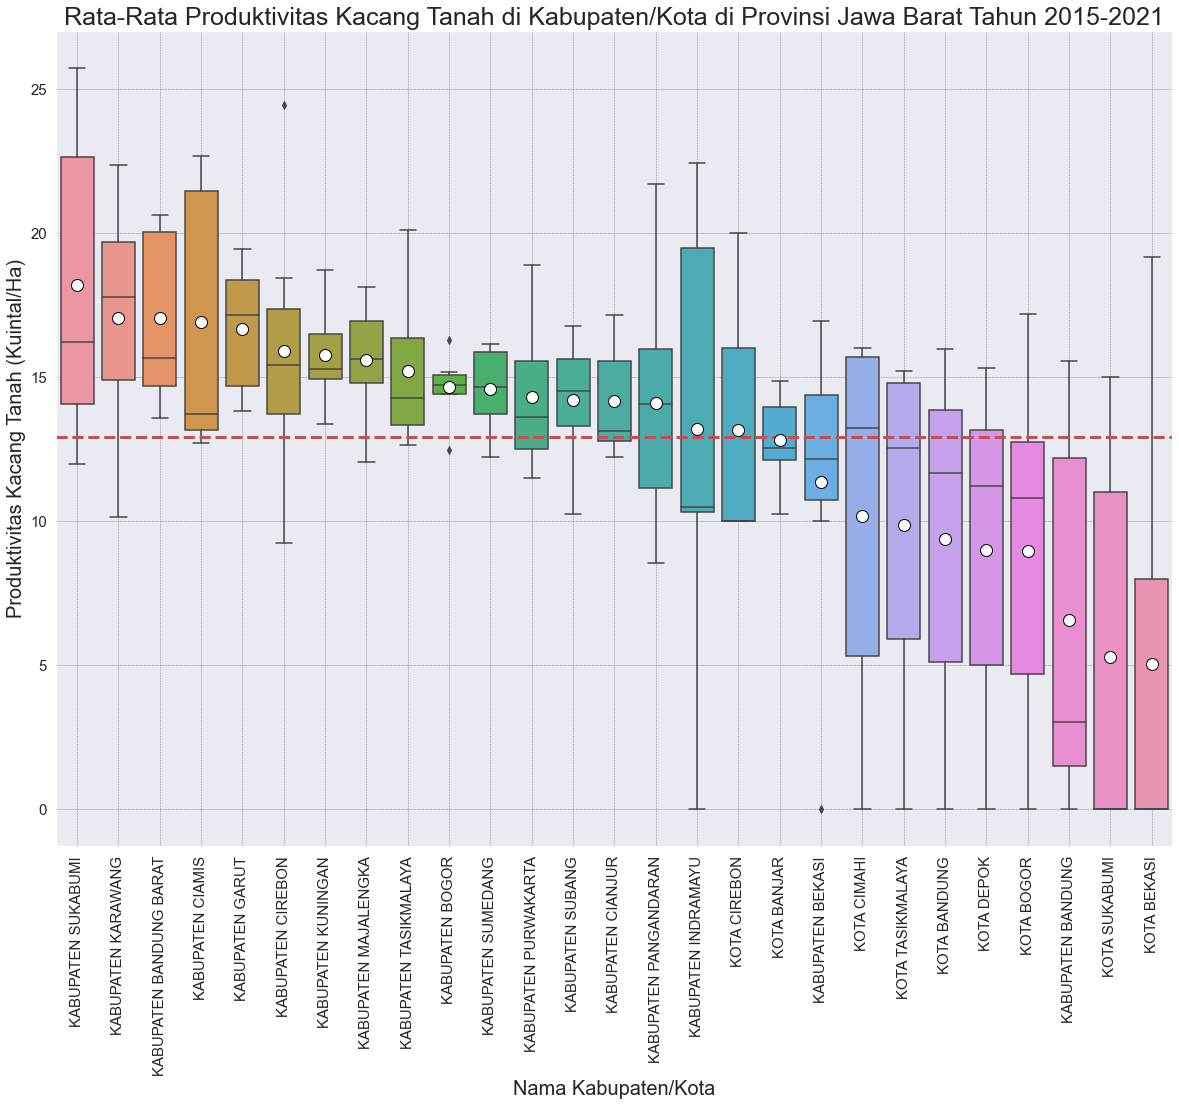

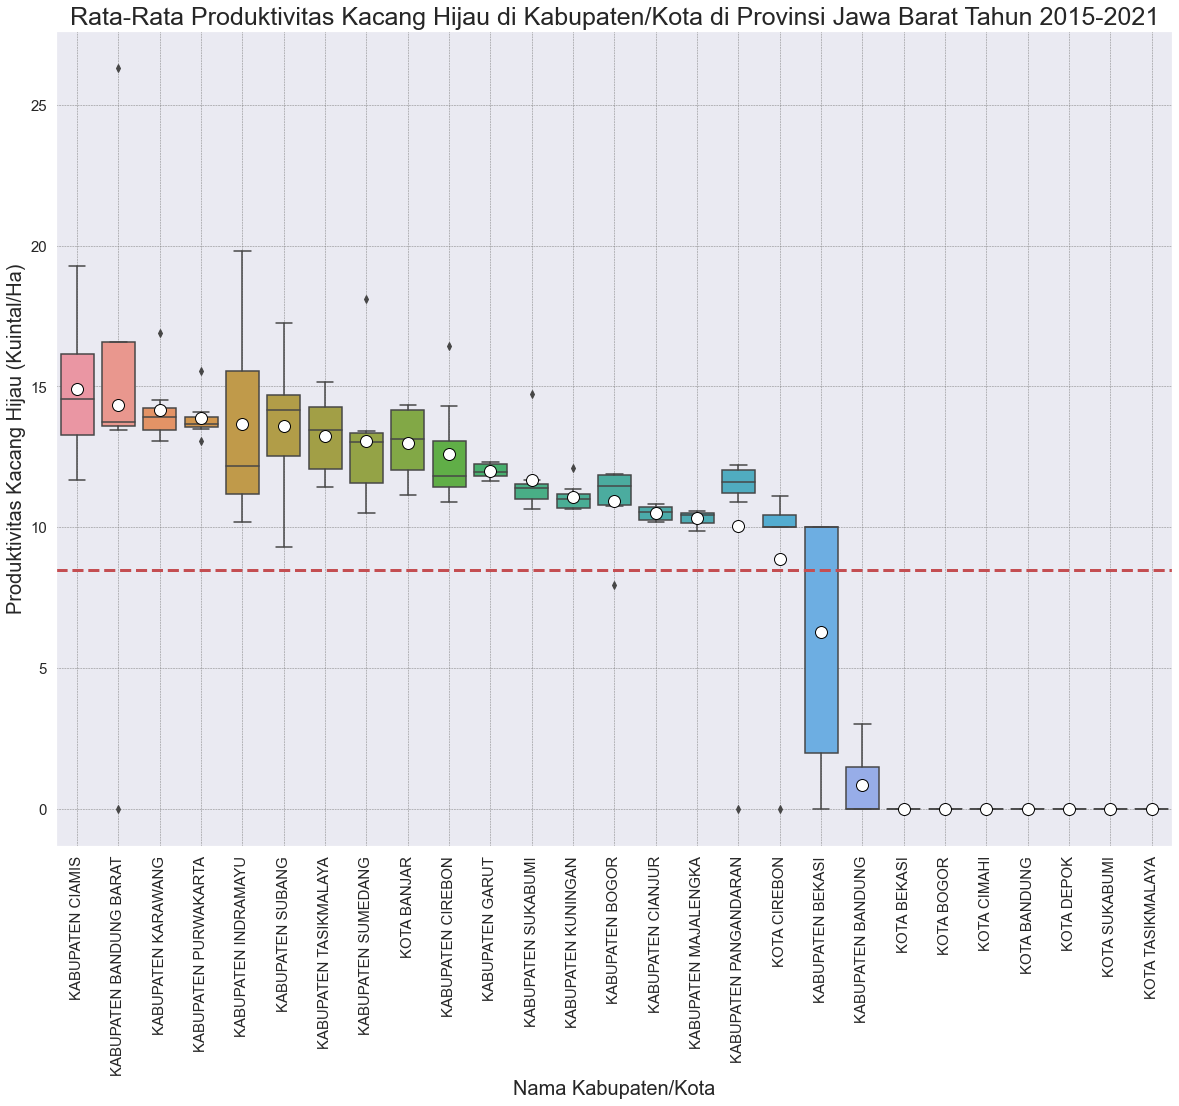

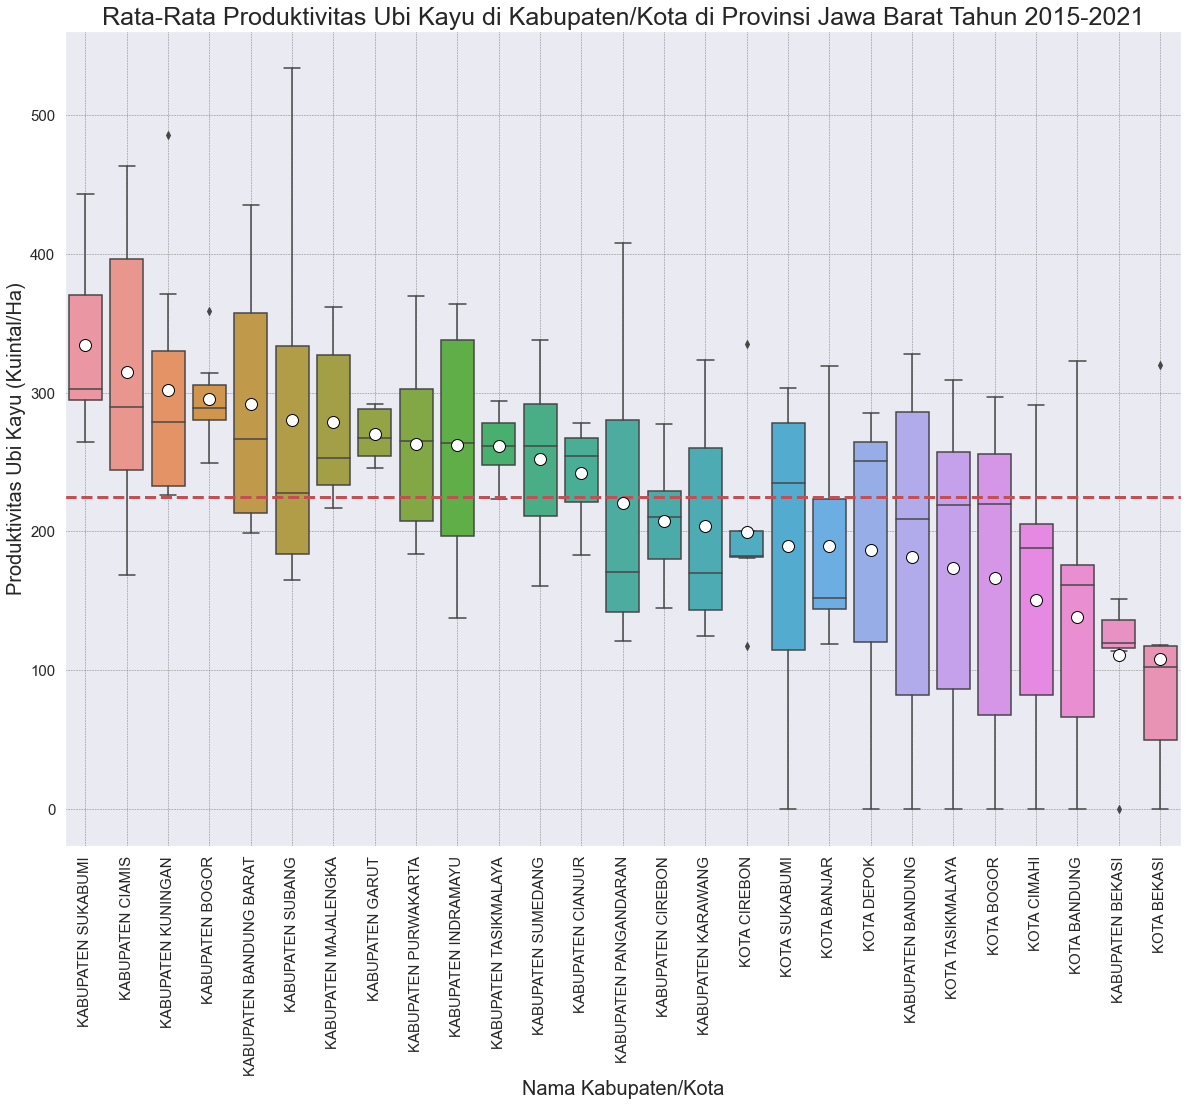

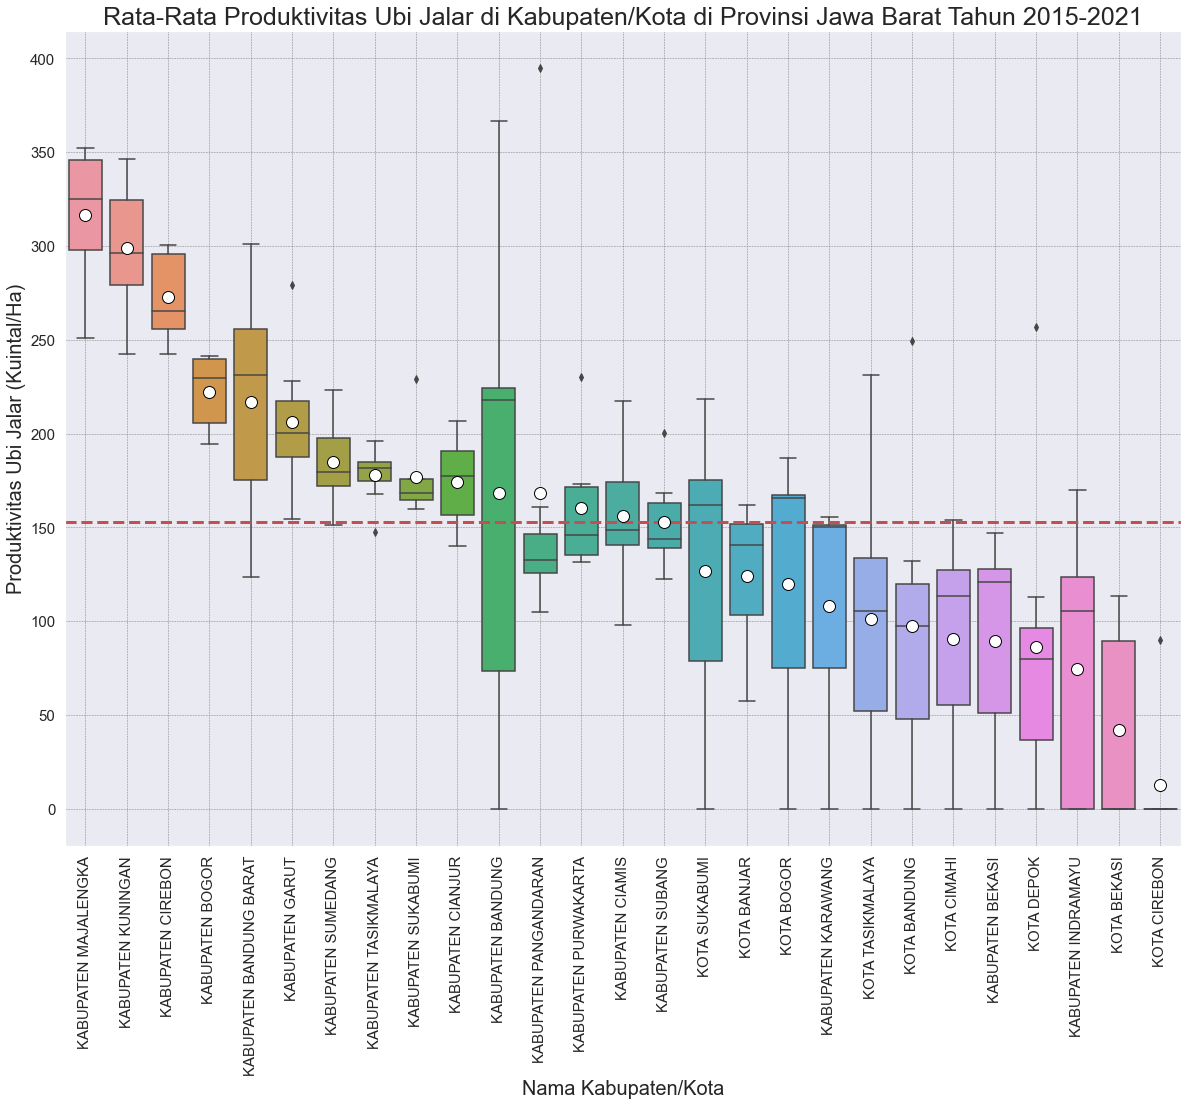

In [267]:
for col in data.columns[7:]:
  if 'produktivitas' in col:
    create_boxplot(data, col, "Kuintal/Ha")

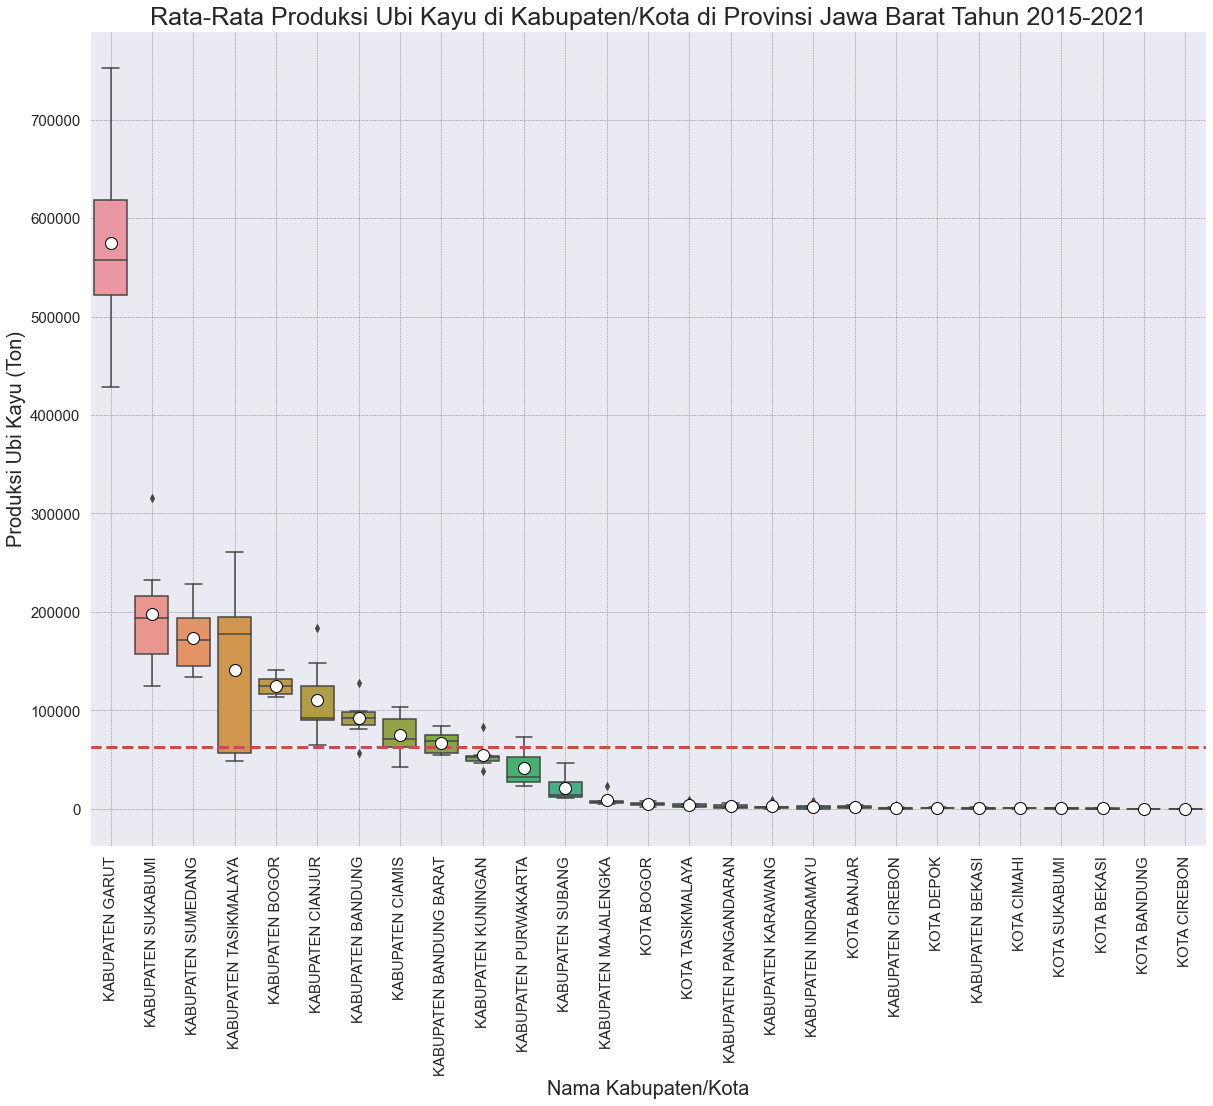

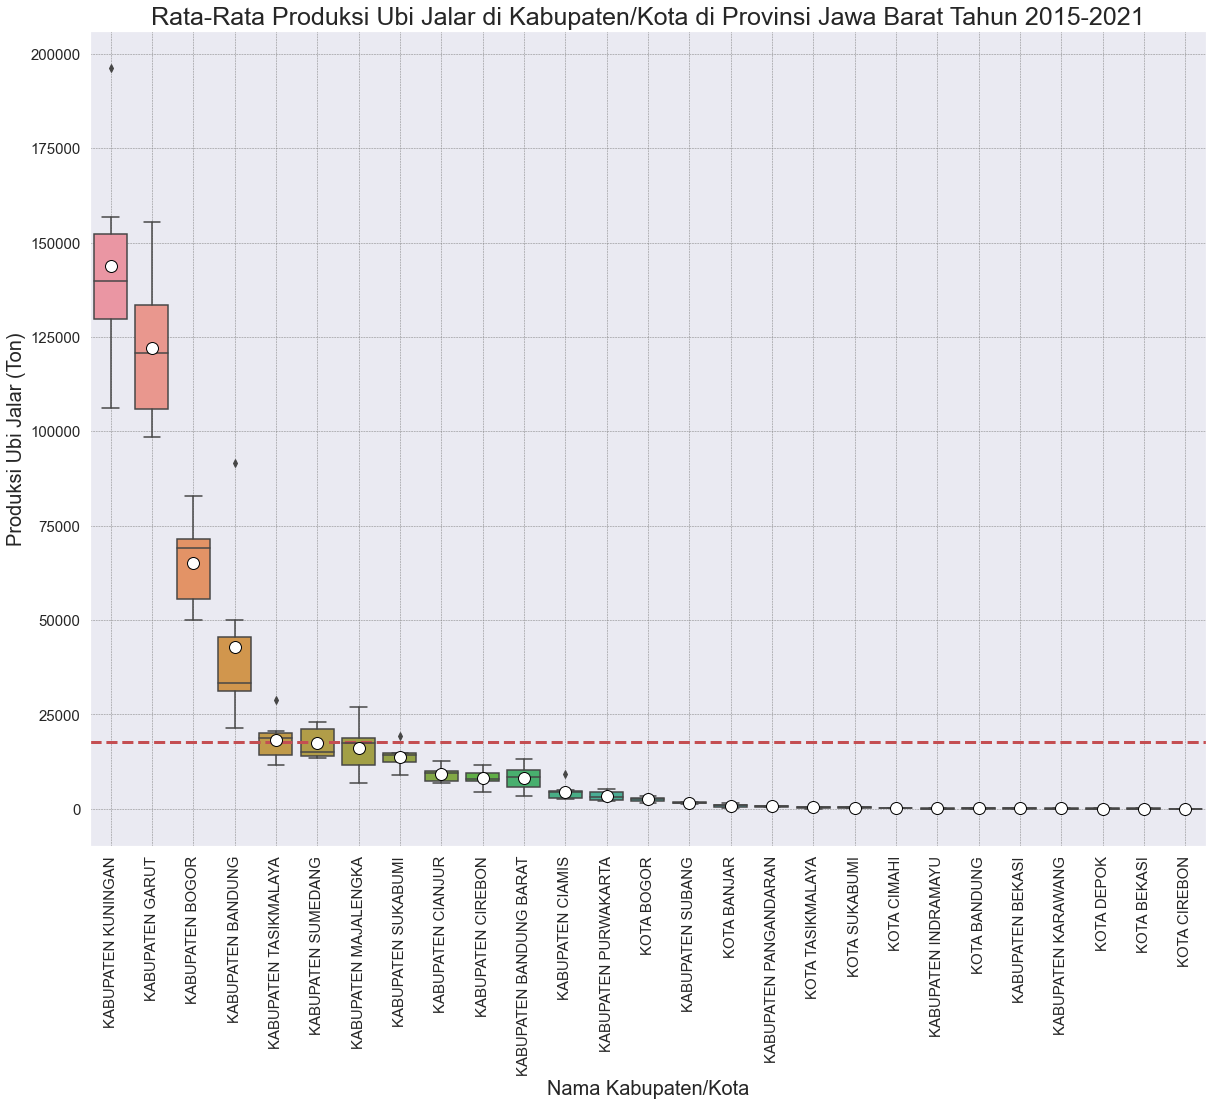

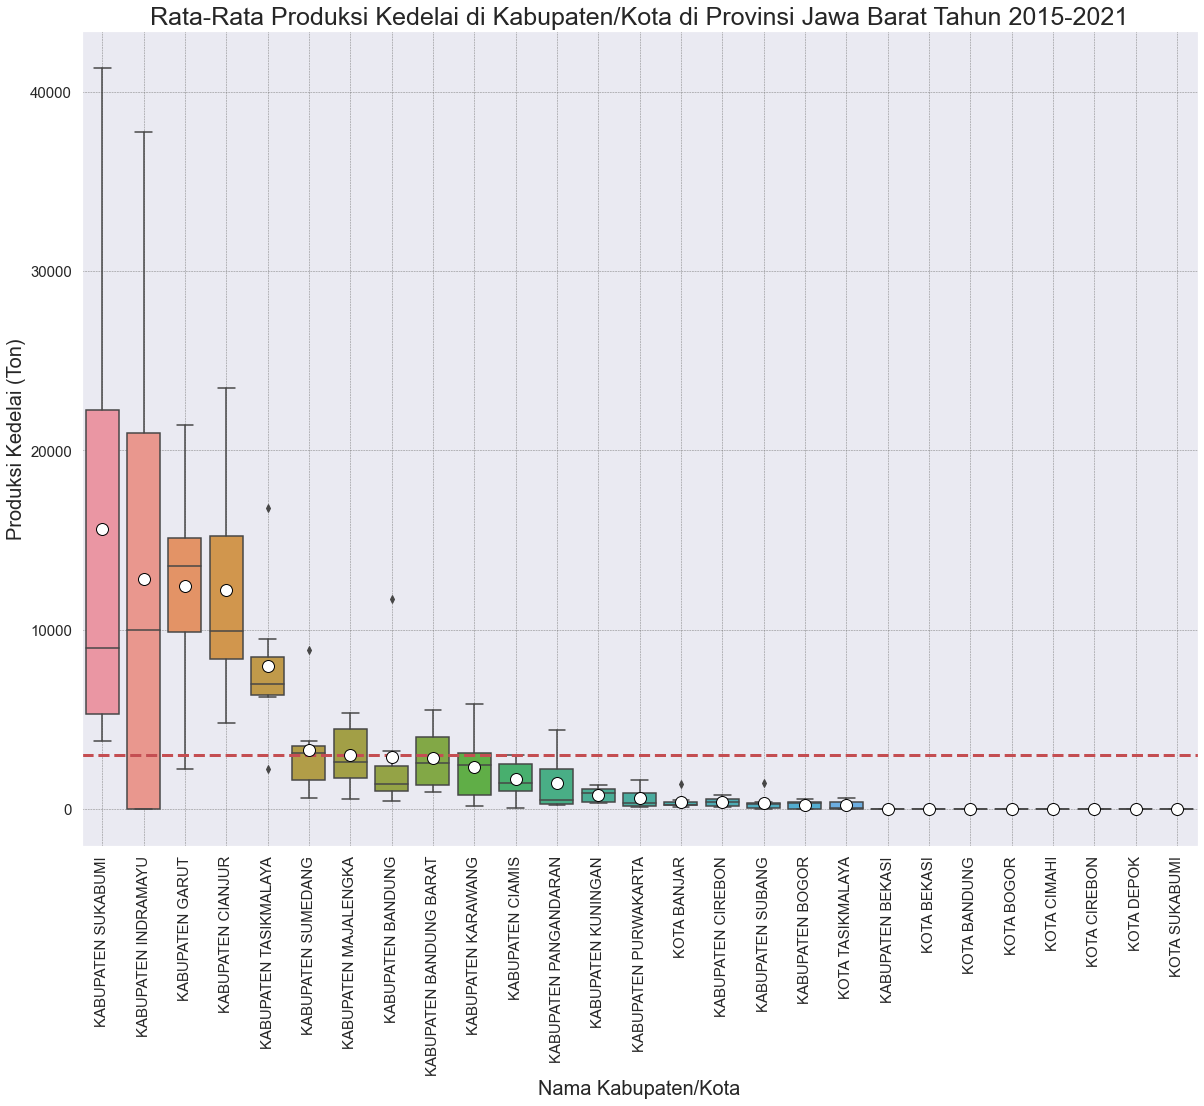

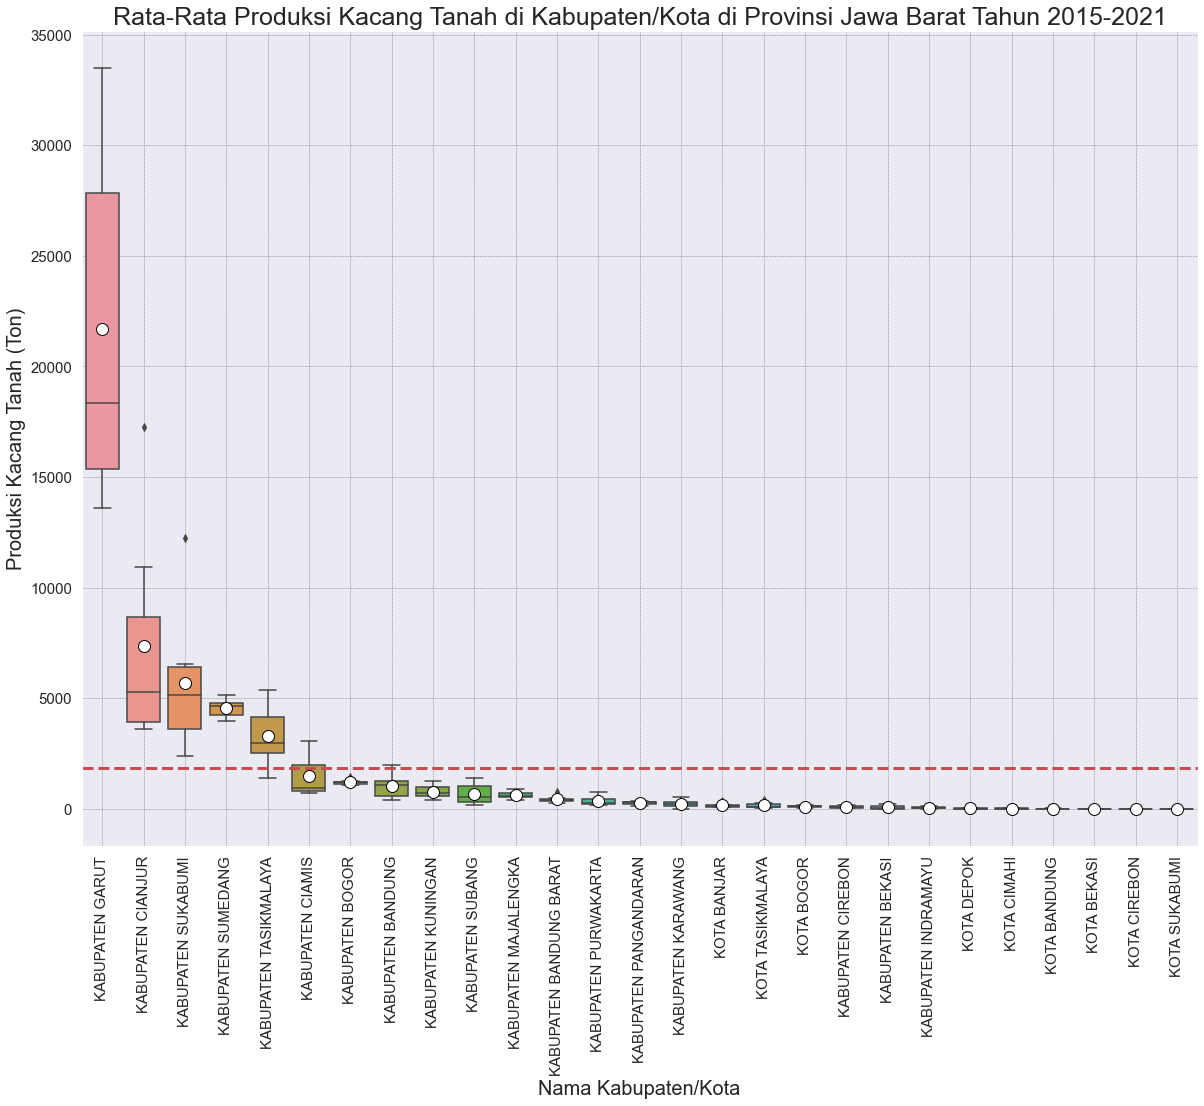

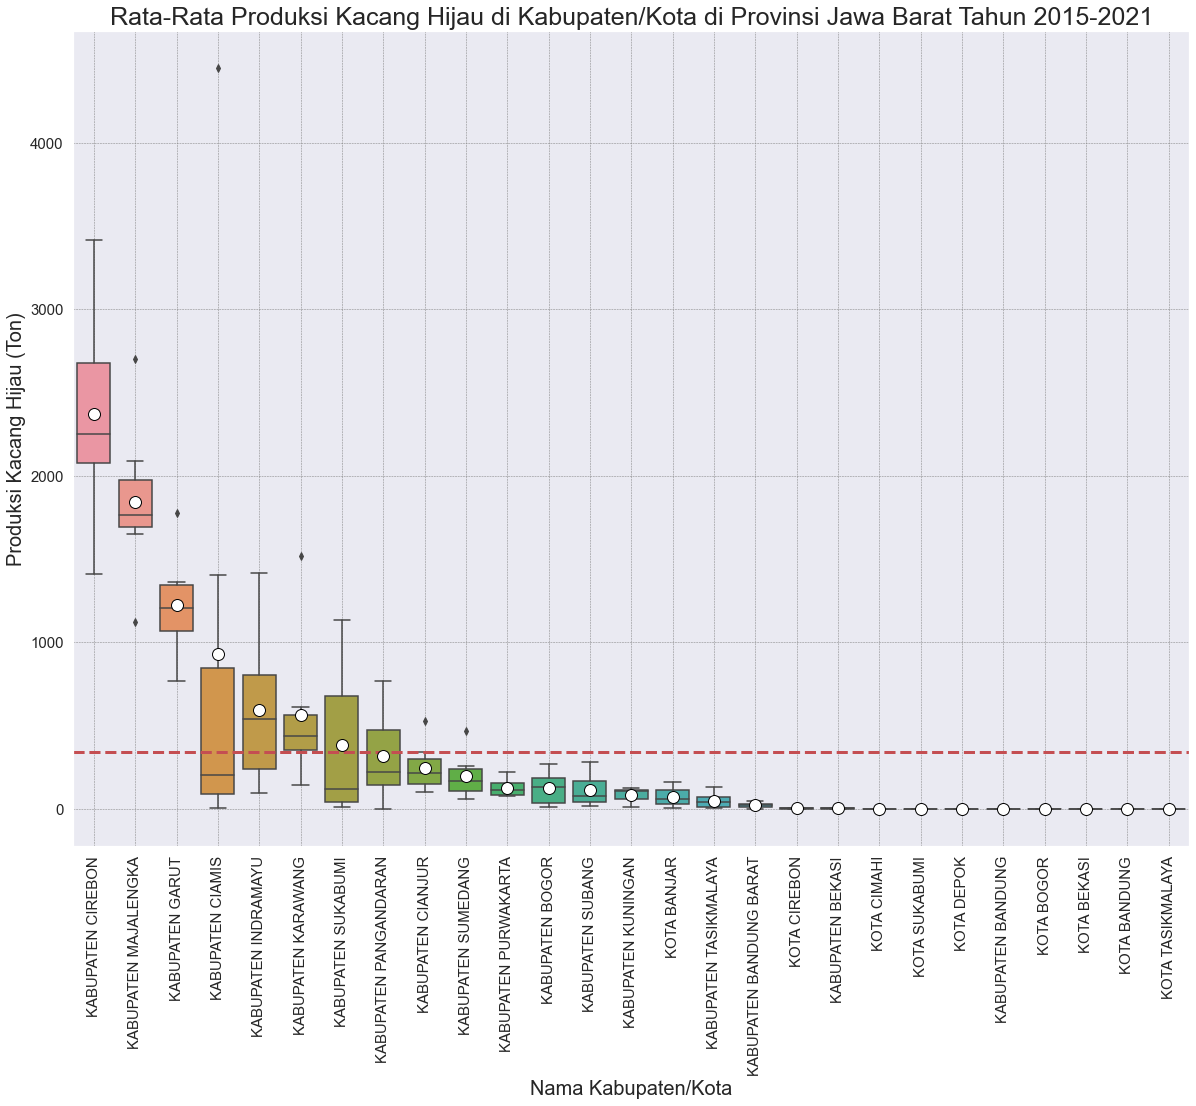

In [259]:
for col in data.columns[7:]:
  if 'produksi' in col:
    create_boxplot(data, col, "Ton")

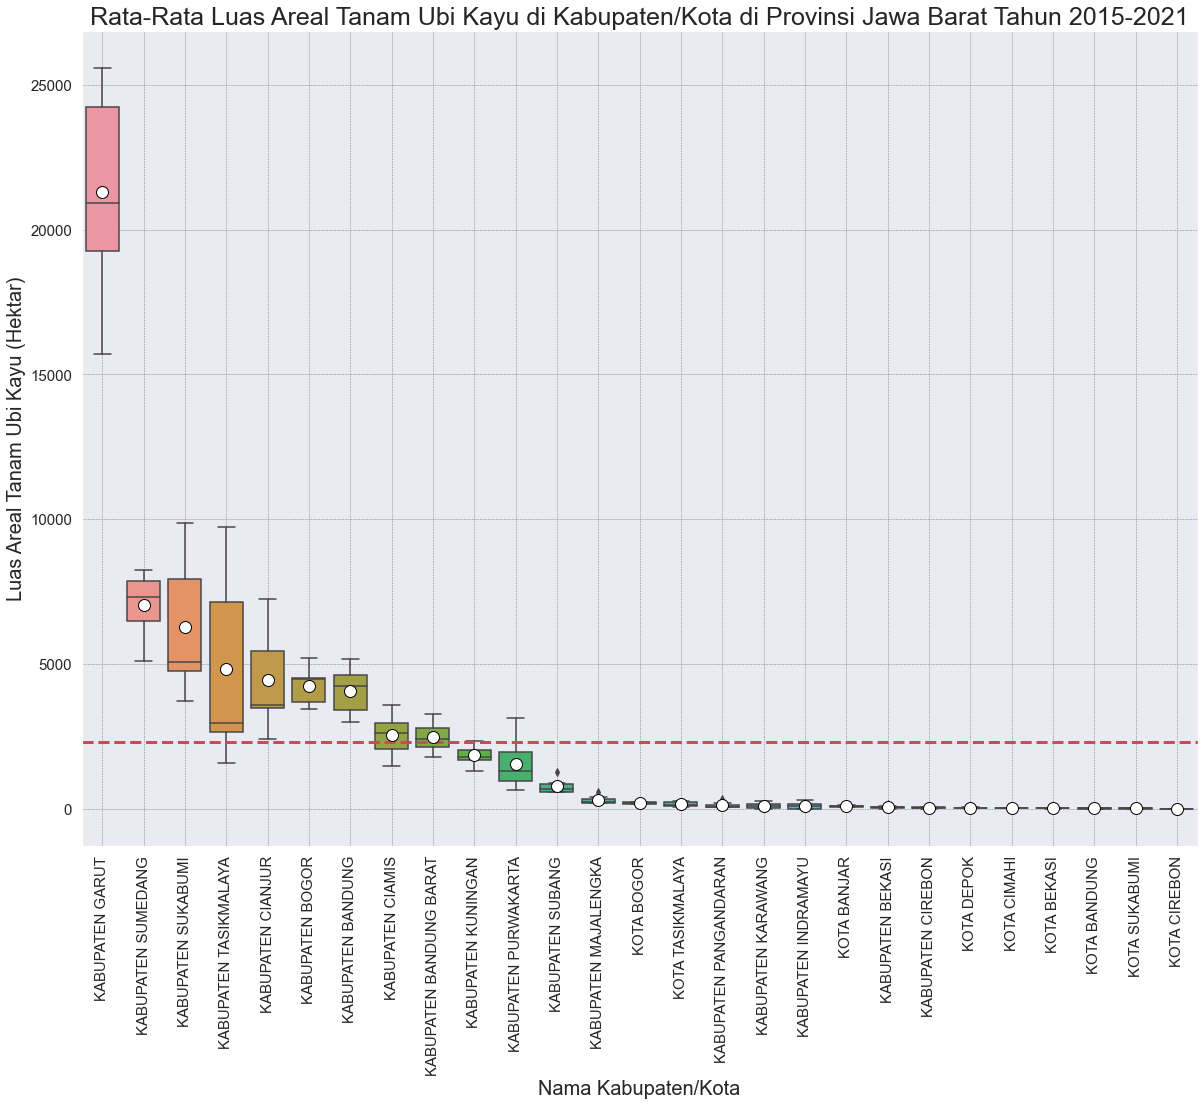

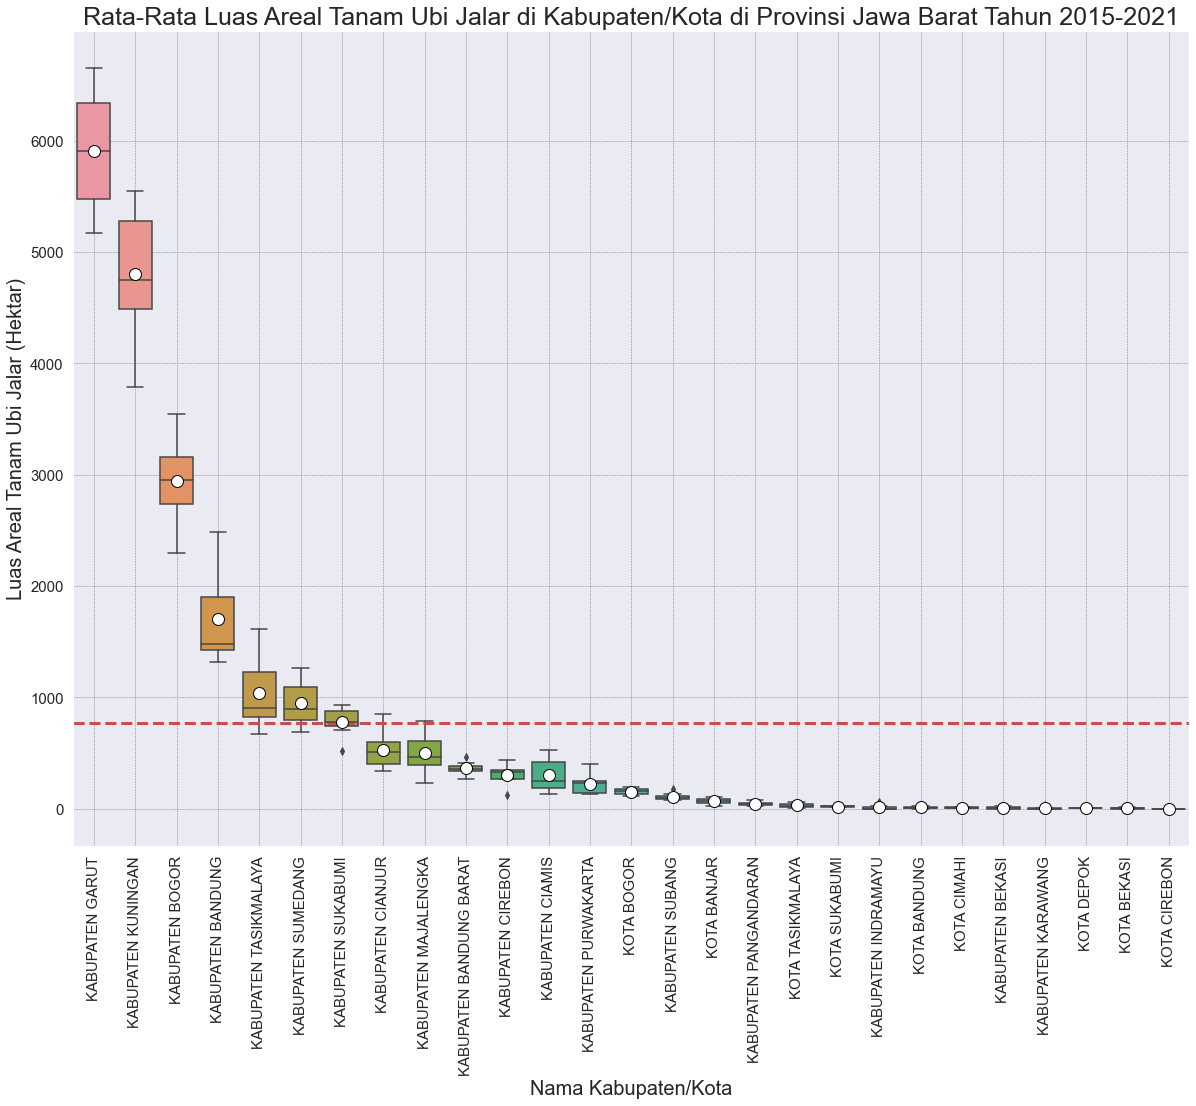

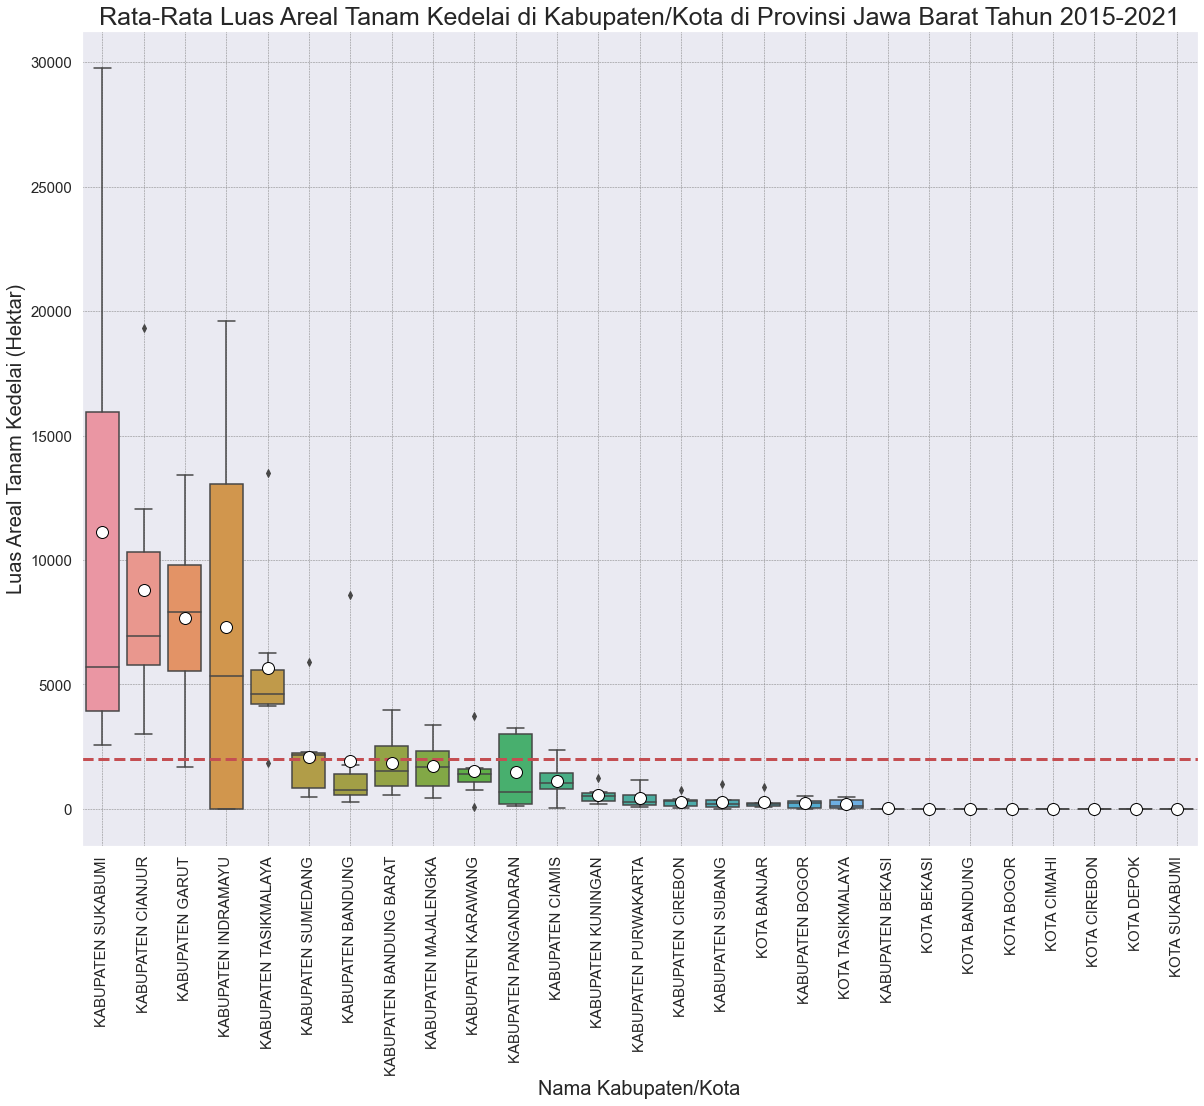

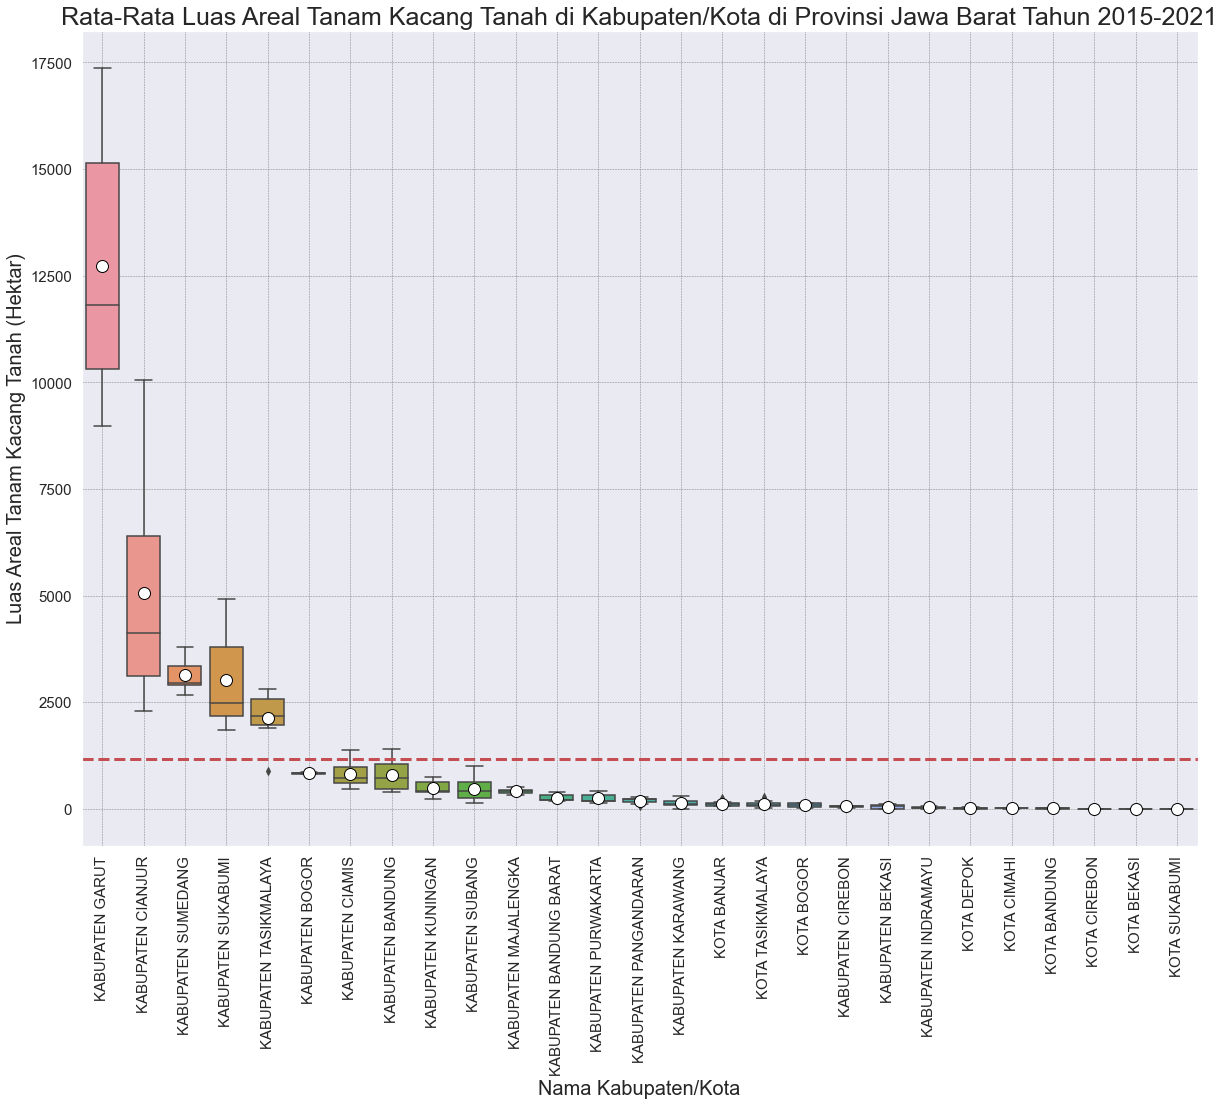

In [260]:
for col in data.columns[7:]:
  if 'luas_areal_tanam' in col:
    create_boxplot(data, col, "Hektar")

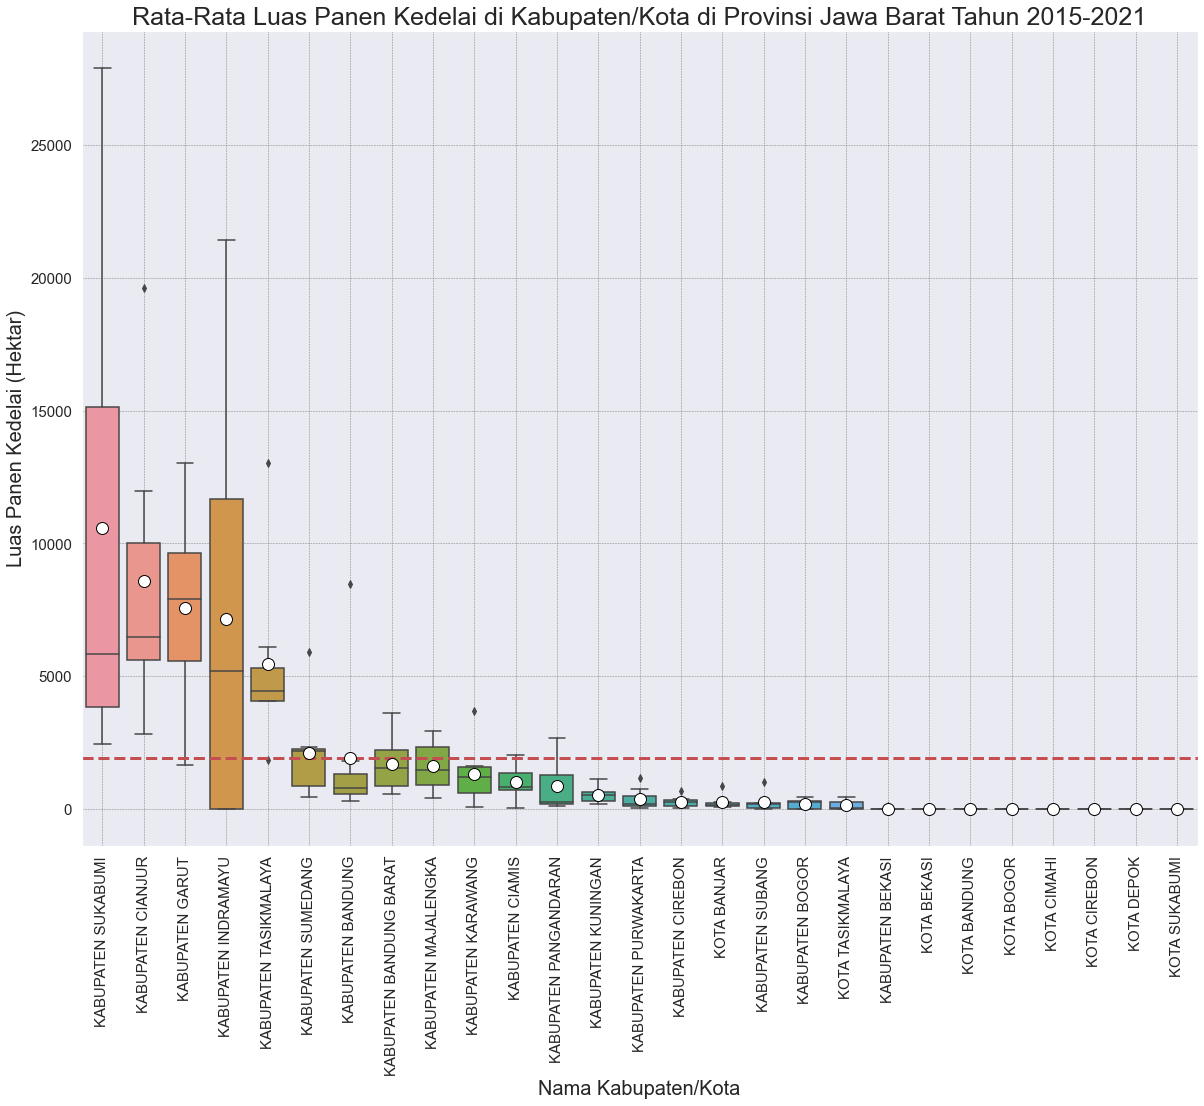

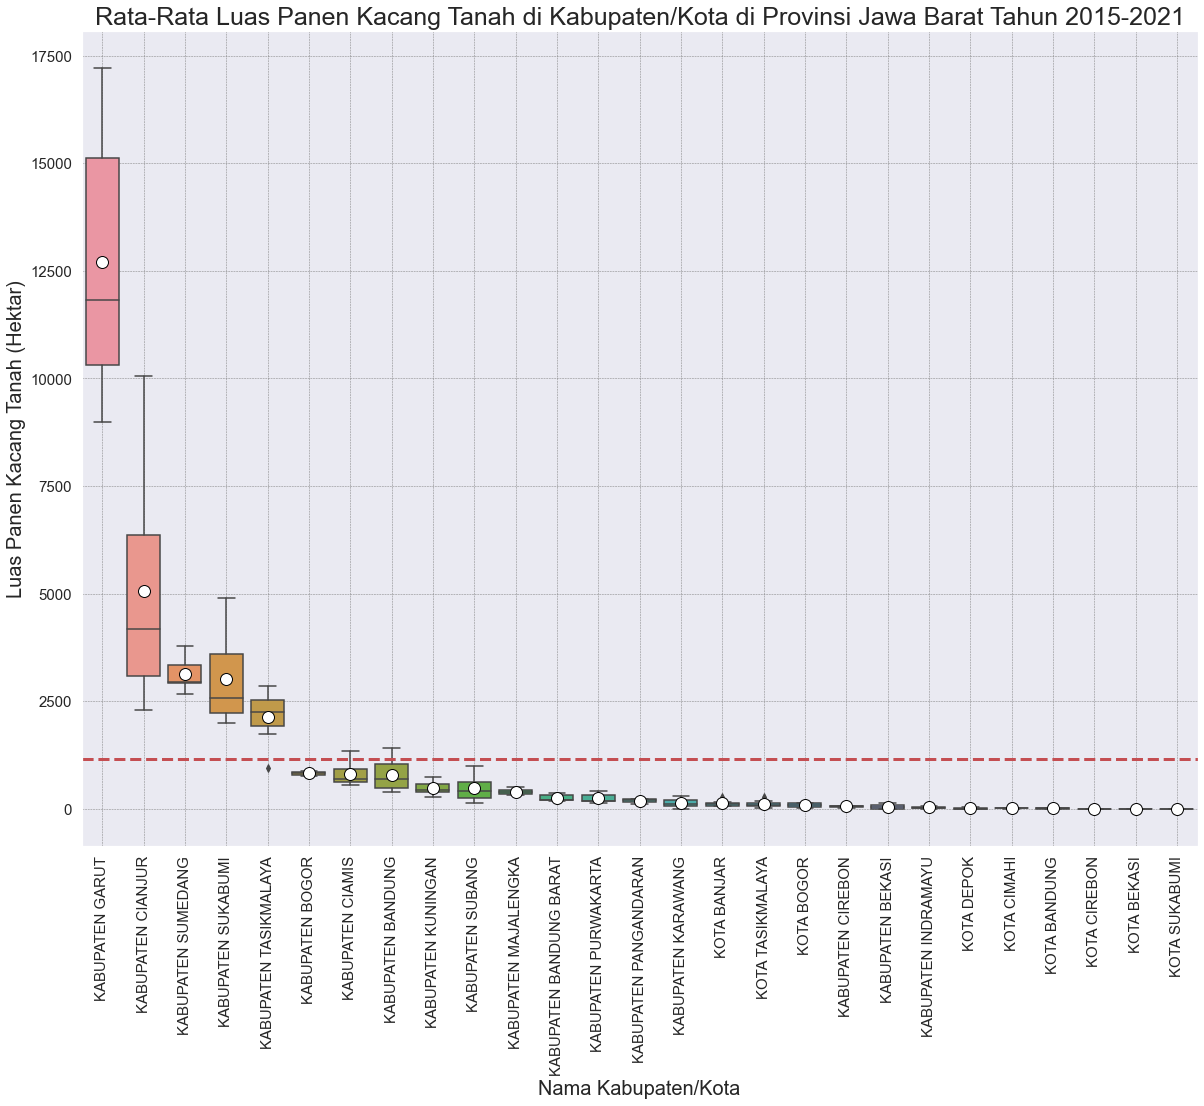

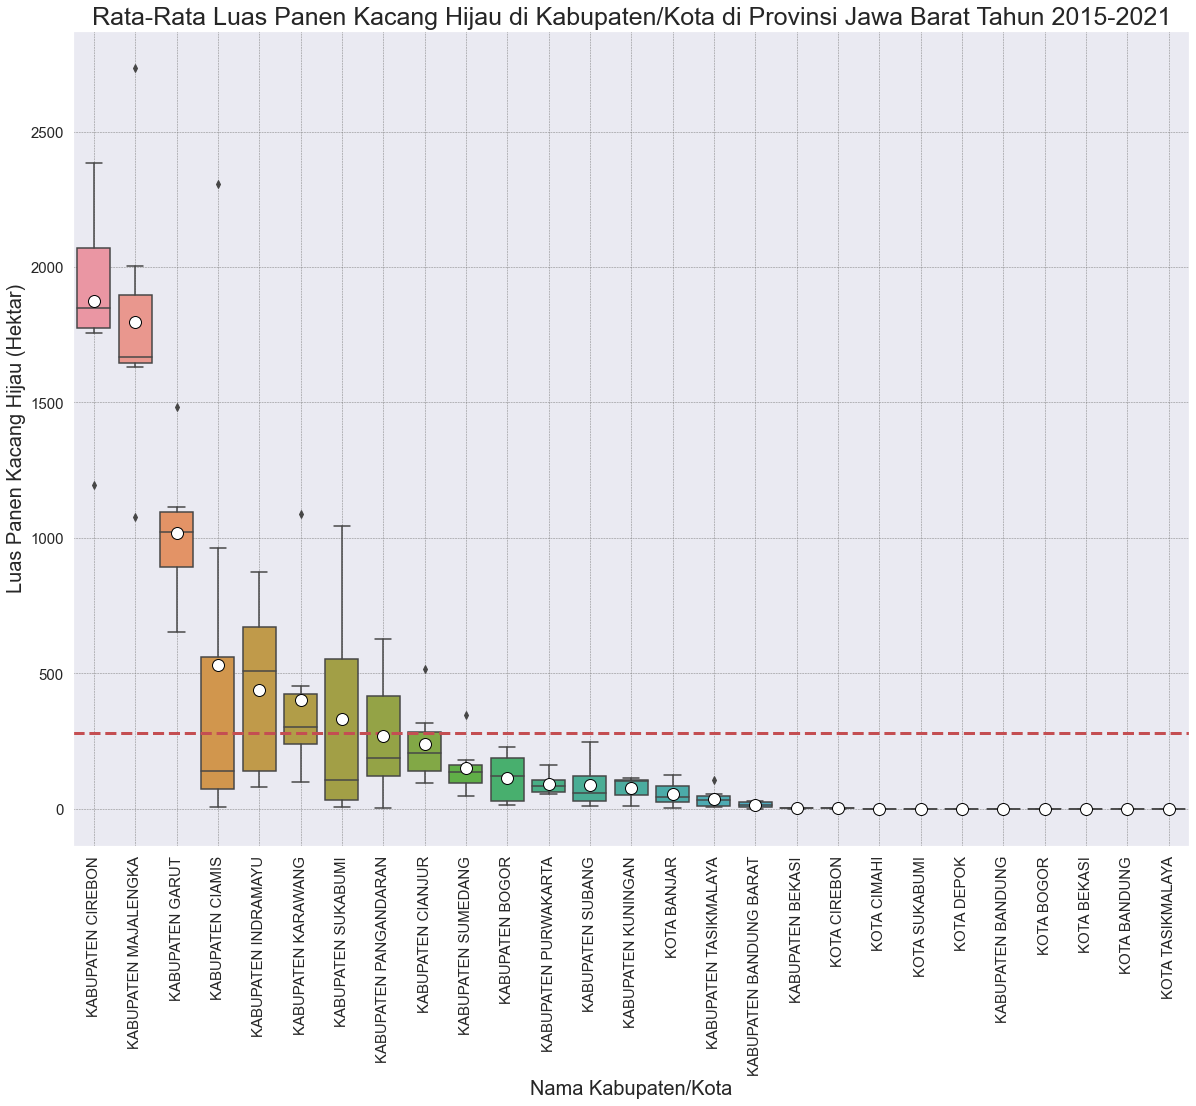

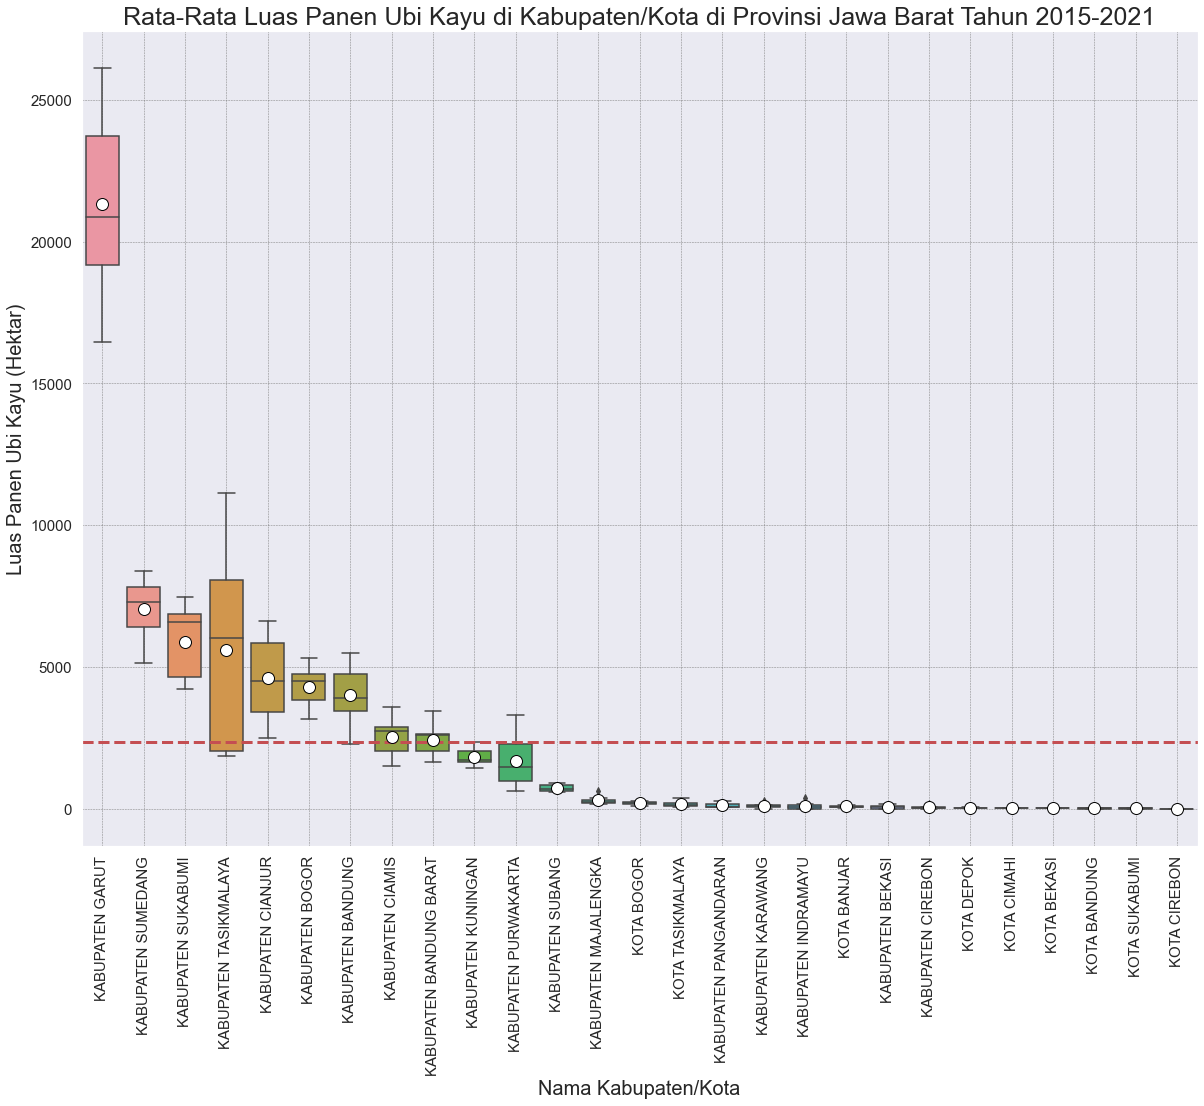

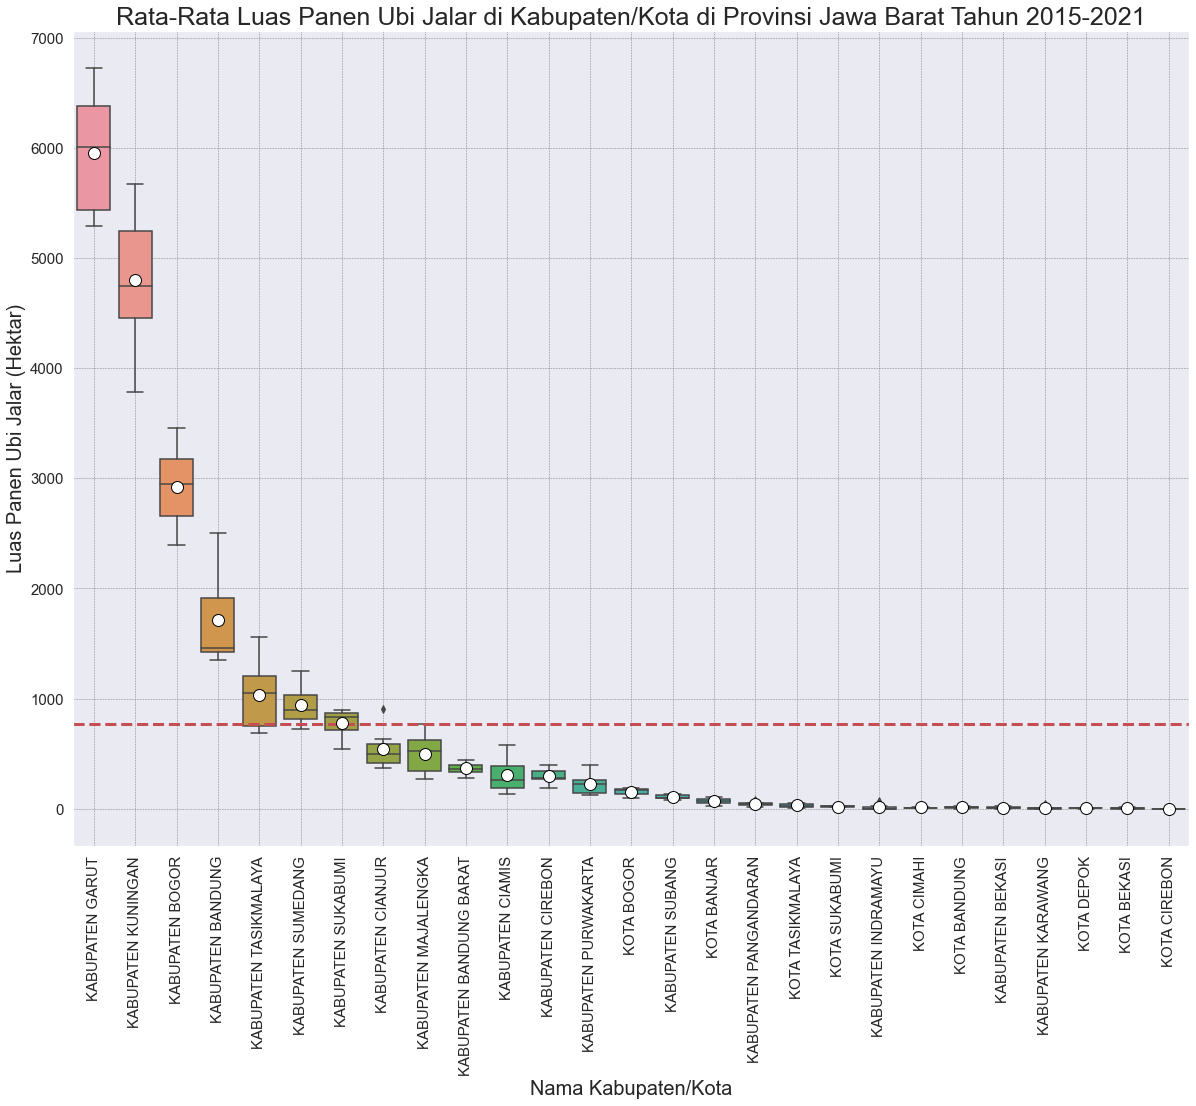

In [261]:
for col in data.columns[7:]:
  if 'luas_panen' in col:
    create_boxplot(data, col, "Hektar")